# 1.0 Project Overview

### For this project, I used CRISP - DM methodology to perform data cleaning, imputation, analysis, and visualization and generate insights for the business stakeholder.

# 1.1 Business Understanding

### The company is expanding in to new industries to diversify its portfolio. Specifically, it is interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. This analysis is expected to determine: 
#### 1.1.1 Which aircraft are the lowest risk for the company to start this new business endeavor. 
#### 1.1.2 I must translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# 1.2 The Data

### I have sourced my data from the dataset link https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses, from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# 2.0 Data Understanding and Analysis

## 2.1 Importing Libraries

 To import a collection of functions that can be added to the python code

In [64]:
# Importing the libraries I will need

# Importing the pandas library
#
import pandas as pd # used for working with data sets

# Importing the numpy library
#
import numpy as np # used for mathematical computation # built on top of pandas
#
import matplotlib.pyplot as plt # to be used to plot visuals
#
import seaborn as sns # to use in plotting

## 2.2 Reading the Dataset from CSV files

To read comma separeted values files

In [65]:
# Read the data from the CSV files and create dataframe to be used
#
df= pd.read_csv("AviationData.csv", encoding='ISO-8859-1', engine='python') 
df1= pd.read_csv("USState_Codes.csv")

### 2.2.1 Previewing the Dataset

Exploring the data set for information.

In [66]:
# To preview the first 5 rows of the AviationData assigned to df to ensure that it has been loaded correctly.
#
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Information about the dataset:
- The data frame contains 31 rows with information about aviation accidents.
- There are columns with null values.

In [67]:
# To preview the first 5 rows of the US states data assigned to df1 to ensure that it has been loaded correctly.
#
df1.head()


,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Information about the dataset
- The dataset contains US States and their abbreviations

In [68]:
# Getting to know more about the dataset by accessing its information
#
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Information about the data set:
- 88889 rows and 31 columns successfully loaded
- Data types: 5 columns with float64 type of data and 26 columns with object type of data
- There are columns with null values examples: Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity,Aircraft.damage, Aircraft.Category, Registration.Number,Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Report.Status and Publication.Date  

In [69]:
# Getting to know more about the dataset by accessing its information
#
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


Information about the dataset:
- The dataset has two columns
- The columns in the data set has no null values

In [70]:
# This function returns last 5 rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.
#
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Information about the data set:
- The tail shows that there are 31 columns.
- The dataset has a mix of data types

In [71]:
# This function returns last 5 rows from the object based on position. It is useful for quickly verifying data.
#
df1.tail()

,US_State,Abbreviation
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


Information about the dataset
- The dataset contains US states and their abbreviations.
- The abbreaviations of the states are all in upper case while the states have a mix of cases.

In [72]:
# checking the shape and number of variables using df.shape or len(df)
#
df.shape, len(df)

((88889, 31), 88889)

Information of df dataset:
- Our dataset has 88,889 rows and 39 columns.

In [73]:
# checking shape and the number of records using .shape or len()
#
df1.shape,len(df1)

((62, 2), 62)

Information of df1 dataset:
- Our dataset has 62 rows and 2 columns.

### 2.2.2 Dropping columns I may not need for my analysis

Drop columns with null values of above 50% of the records. High level of null values may complicate my analysis and the results obtained thereafter.

In [74]:
# establishing columns that may not be relevant to the analysis
#
to_drop=df.isna().sum()>0.30*len(df) # establishing the number of nulls in each column and if the nulls exceeds 30% of the rows present in the column

columns_to_drop=to_drop[to_drop.values].index #columns to drop
 
for col in columns_to_drop:
    df.drop(columns=col,inplace=True) # removing the columns with nulls exceeding 30% of the total rows in the specified column
print(df.info()) # summary of cleaned dataframe
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87572 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81812 non-null  object 
 14  Purpose.of.flight       82697 non-null

Summary of the cleaned data frame:
- After removing columns not required, I remained with a total of 22 columns

## 2.2.3 Adding columns

Adding columns to help combine location and  state to help in identifying geographical locations.

In [75]:
# Display the first five rows in the data set
#
df1.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Extracting Abbreviation and location from Location to use when merging df and df1 dataframes


In [76]:
# split the 'LOCATION' column to extract the town and the state abbreviation
#
df[['Town','Abbreviation']]=df['Location'].str.split(", ", n=1, expand=True)

# Display the first five rows in the data set
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,Town,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980,Canton,OH


Achieve extraction of the two columns named 'Town' and 'Abbreviation' from 'Location' column.

In [77]:
# merge df data on accidents and df1 on states and their abbreviations
#
df_merged = pd.merge(df, df1, on='Abbreviation', how='left') 

# check the first five rows to confirm if df and df1 have merged successfully.
df_merged.head() 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,Town,Abbreviation,US_State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,MOOSE CREEK,ID,Idaho
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,BRIDGEPORT,CA,California
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007,Saltville,VA,Virginia
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,EUREKA,CA,California
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980,Canton,OH,Ohio


After merging df and df1, I have df_merged dataframe which has 'US_STATE' column

## 2.3 Data Preparation

Data cleaning is to help achieve meaningful and accurate data.

### 2.3.1 Checking for consistency and validity

### 2.3.1.1 Check for duplicates

In [78]:
#checking for duplicates
#
df_merged.duplicated().any()

False

### 2.3.1.2 Check for null values

We need to check for null values to ensures the data is complete.

In [79]:
#checking missing values 
#
df_merged.isnull().sum() # enumerate the sum of null values in each column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6381
Publication.Date          13771
Town                         52
Abbreviation                622
US_State                   6748
dtype: int64

### 2.3.1.3 Replacing null values

#### Filling null values for numerical data

In [80]:
# calculated the mean to replace null values in Nunmber.of.engines column
#
mean_engine_number=df_merged['Number.of.Engines'].mean()

# round off mean to zero decimal place
mean_engine_number_rounded_off=round(mean_engine_number,0)

#use of fillna to replace null values with mean
df_merged['Number.of.Engines']=df_merged['Number.of.Engines'].fillna(mean_engine_number_rounded_off)

# to check if there remaining nulls in the column
print(df_merged['Number.of.Engines'].isnull().sum()) 

0


No aircraft operates without an engine hence had to replace those with nill with the mean of the NUMBER.OF.ENGINES column

In [81]:
# replace nill engine number with mean of Number.of.Engines column
#
df_merged['Number.of.Engines'] = df_merged['Number.of.Engines'].replace('0', mean_engine_number_rounded_off)

# check the statistics of the column after the replacement
print(df_merged['Number.of.Engines'].describe())

count    88889.000000
mean         1.136552
std          0.432545
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64


Filing up null values of numerical columns of interest with its mean

In [82]:
# calculated the mean to replace null values in Total.Uninjured column
#
mean_total_uninjured=df_merged['Total.Uninjured'].mean()

# round off mean to zero decimal place
mean_total_uninjured_rounded_off=round(mean_total_uninjured,0)

#use of fillna to replace null values with mean
df_merged['Total.Uninjured']= df_merged['Total.Uninjured'].fillna((mean_total_uninjured_rounded_off))

# to check if there remaining nulls in the column
print(df_merged['Total.Uninjured'].isnull().sum()) 


0


In [83]:
# calculated the mean to replace null values in 'Total.Fatal.Injuries' column
#
mean_total_fatal_injuries=df_merged['Total.Fatal.Injuries'].mean()

# round off mean to zero decimal place
mean_total_fatal_injuries_rounded_off=round(mean_total_fatal_injuries,0)

#use of fillna to replace null values with mean
df_merged['Total.Fatal.Injuries']= df_merged['Total.Fatal.Injuries'].fillna((mean_total_fatal_injuries_rounded_off))

# to check if there remaining nulls in the column
print(df_merged['Total.Fatal.Injuries'].isnull().sum()) 


0


In [84]:
# calculated the mean to replace null values in 'Total.Serious.Injuries' column
#
mean_total_serious_injuries=df_merged['Total.Serious.Injuries'].mean()

# round off mean to zero decimal place
mean_total_serious_injuries_rounded_off=round(mean_total_serious_injuries,0)

#use of fillna to replace null values with mean
df_merged['Total.Serious.Injuries']= df_merged['Total.Serious.Injuries'].fillna((mean_total_serious_injuries_rounded_off))

# to check if there remaining nulls in the column
print(df_merged['Total.Serious.Injuries'].isnull().sum()) 


0


In [85]:
# calculated the mean to replace null values in 'Total.Minor.Injuries' column
#
mean_total_minor_injuries=df_merged['Total.Minor.Injuries'].mean()

# round off mean to zero decimal place
mean_total_minor_injuries_rounded_off=round(mean_total_minor_injuries,0)

#use of fillna to replace null values with mean
df_merged['Total.Minor.Injuries']= df_merged['Total.Minor.Injuries'].fillna((mean_total_minor_injuries_rounded_off))

# to check if there remaining nulls in the column
print(df_merged['Total.Minor.Injuries'].isnull().sum()) 


0


#### 2.3.1.4 Filling null values for categorical data

In [86]:
# establish the first mode for the engine type
#
mode_ENGINE_TYPE=df_merged['Engine.Type'].mode()[0]
mode_ENGINE_TYPE

'Reciprocating'

In [87]:
# replace null values with mode of ENGINE.TYPE column
#
df_merged['Engine.Type'] = df_merged['Engine.Type'].fillna(mode_ENGINE_TYPE)

# check if the replacing nulls has taken place and unique values in the column
print(df_merged['Engine.Type'].unique())

['Reciprocating' 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'None' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR'
 'NONE' 'UNK']


Replacing null values and non-unique values with the mode of Engine.type column

In [88]:
# replace 'Unknown' and 'None' with mode of ENGINE.TYPE column
#
df_merged['Engine.Type'] = df_merged['Engine.Type'].str.replace('Unknown', mode_ENGINE_TYPE)

# replace 'None' with mode of ENGINE.TYPE column

df_merged['Engine.Type'] = df_merged['Engine.Type'].str.replace('None', mode_ENGINE_TYPE)

# replace 'NONE' with mode of ENGINE.TYPE column

df_merged['Engine.Type'] = df_merged['Engine.Type'].str.replace('NONE', mode_ENGINE_TYPE)

# check if the replacing nulls has taken place and unique values in the column
print(df_merged['Engine.Type'].unique())


['Reciprocating' 'Turbo Fan' 'Turbo Shaft' 'Turbo Prop' 'Turbo Jet'
 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'UNK']


In [89]:
# to check if there remaining nulls in the column
#
print(df_merged['Engine.Type'].isnull().sum()) 

0


Replacing null values and non-unique values with the mode of Make column

In [90]:
# calculated the first mode of Make to replace null values in the column
#
mode_MAKE=df_merged['Make'].mode()[0]

#use of fillna to replace null values with mode
df_merged['Make']=df_merged['Make'].fillna(mode_MAKE)

# check if the replacing nulls has taken place in the column
print(df_merged['Make'].isnull().sum())


0


Replacing null values and non-unique values with the mode of Model column

In [91]:
# calculated the first mode of Model to replace null values 
#
mode_MODEL=df_merged['Model'].mode()[0]

#use of fillna to replace null values with mode
df_merged['Model']=df_merged['Model'].fillna(mode_MODEL)

# check if the replacing nulls has taken place in the column
print(df_merged['Model'].isnull().sum())

0


Replacing null values and non-unique values with the mode of Amateur.Built column

In [92]:
# calculated the first mode of Amateur.Built to replace null values 
#
mode_Amateur_Build=df_merged['Amateur.Built'].mode()[0]

#use of fillna to replace null values with mode
df_merged['Amateur.Built']=df_merged['Amateur.Built'].fillna(mode_Amateur_Build)

# check if the replacing nulls has taken place in the column
print(df_merged['Amateur.Built'].isnull().sum())

0


Replacing null values and non-unique values with the mode of Purpose.of.Flight column

In [93]:
# calculated the first mode of Amateur.Built to replace null values 
#
mode_purpose_of_flight=df_merged['Purpose.of.flight'].mode()[0]

#use of fillna to replace null values with mode
df_merged['Purpose.of.flight']=df_merged['Purpose.of.flight'].fillna(mode_purpose_of_flight)

# replace 'Unknown' with mode of Purpose of flight column

df_merged['Purpose.of.flight'] = df_merged['Purpose.of.flight'].str.replace('Unknown', mode_purpose_of_flight)

# replace 'Null' with mode of Purpose of flight column

df_merged['Purpose.of.flight'] = df_merged['Purpose.of.flight'].str.replace('Null', mode_purpose_of_flight)


# check if the replacing nulls has taken place in the column
print(df_merged['Purpose.of.flight'].isnull().sum())

0


Replacing null values of the US_State column

In [94]:
#use of fillna to replace null values with mode
#
df_merged['US_State']=df_merged['US_State'].fillna('Uknown')

# check if the replacing nulls has taken place in the column
print(df_merged['US_State'].isnull().sum())

0


### 2.3.2 Uniformity 

Making dataset by achieving one standard across helps prepare dataset for exploration.

### 2.3.2.1 Achieving one standard case

In [95]:
# Change 'Make' be unique and of standard type using .upper()
#
df_merged['Make']=df_merged['Make'].str.upper()

# check if the uniform upper case has been achieved
print(df_merged['Make'].unique())

['STINSON' 'PIPER' 'CESSNA' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']


In [96]:
# Change 'Model' be unique and of standard type using .upper()
#
df_merged['Model'] = df_merged['Model'].str.upper()

# check if the uniform upper case has been achieved
print(df_merged['Model'].unique())


['108-3' 'PA24-180' '172M' ... 'MH-60R' 'KITFOX S5' 'M-8 EAGLE']


In [97]:
# Change 'Location' be unique and of standard type using .upper()
#
df_merged['Location'] = df_merged['Location'].str.upper()

# Check if the uniform upper case has been achieved
print(df_merged['Location'].unique())

['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'SALTVILLE, VA' ... 'SAN MANUAL, AZ'
 'AUBURN HILLS, MI' 'BRASNORTE, ']


In [98]:
# Change 'Purpose of flight' be unique and of standard type using .upper()
#
df_merged['Purpose.of.flight'] = df_merged['Purpose.of.flight'].str.upper()

# Check if the uniform upper case has been achieved
print(df_merged['Purpose.of.flight'].unique())

['PERSONAL' 'BUSINESS' 'INSTRUCTIONAL' 'FERRY' 'EXECUTIVE/CORPORATE'
 'AERIAL OBSERVATION' 'AERIAL APPLICATION' 'PUBLIC AIRCRAFT' 'SKYDIVING'
 'OTHER WORK USE' 'POSITIONING' 'FLIGHT TEST' 'AIR RACE/SHOW' 'AIR DROP'
 'PUBLIC AIRCRAFT - FEDERAL' 'GLIDER TOW' 'PUBLIC AIRCRAFT - LOCAL'
 'EXTERNAL LOAD' 'PUBLIC AIRCRAFT - STATE' 'BANNER TOW' 'FIREFIGHTING'
 'AIR RACE SHOW' 'PUBS' 'ASHO' 'PUBL']


Standardising the dataframe columns

Changing column names to upper case

In [99]:
# Check column names

df_merged.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date', 'Town', 'Abbreviation',
       'US_State'],
      dtype='object')

In [100]:
# Fixing colunm name with upper cases

df_merged.columns = map(lambda x: str(x).upper(), df_merged.columns) # changing column headers of df dataset to upper case

# Check if the column names of df and df1 datasets have been converted to uppercase
df_merged.columns


Index(['EVENT.ID', 'INVESTIGATION.TYPE', 'ACCIDENT.NUMBER', 'EVENT.DATE',
       'LOCATION', 'COUNTRY', 'INJURY.SEVERITY', 'AIRCRAFT.DAMAGE',
       'REGISTRATION.NUMBER', 'MAKE', 'MODEL', 'AMATEUR.BUILT',
       'NUMBER.OF.ENGINES', 'ENGINE.TYPE', 'PURPOSE.OF.FLIGHT',
       'TOTAL.FATAL.INJURIES', 'TOTAL.SERIOUS.INJURIES',
       'TOTAL.MINOR.INJURIES', 'TOTAL.UNINJURED', 'WEATHER.CONDITION',
       'REPORT.STATUS', 'PUBLICATION.DATE', 'TOWN', 'ABBREVIATION',
       'US_STATE'],
      dtype='object')

Standardising case type in the values in the columns of interest

In [101]:
# Capitalising all values in the Engine.Type column for uniformity
df_merged['ENGINE.TYPE'] = df_merged['ENGINE.TYPE'].str.upper()

# Display the last five rows in the column
df_merged['ENGINE.TYPE']. tail()

88884    RECIPROCATING
88885    RECIPROCATING
88886    RECIPROCATING
88887    RECIPROCATING
88888    RECIPROCATING
Name: ENGINE.TYPE, dtype: object

### 2.3.2.2 Removing white spaces

In [102]:
# We can use the str.strip function on colunms to strip the leading and trailing spaces
#
df_merged.columns= df_merged.columns.str.strip()

# Display the first five rows in the data set
df_merged.head()


,EVENT.ID,INVESTIGATION.TYPE,ACCIDENT.NUMBER,EVENT.DATE,LOCATION,COUNTRY,INJURY.SEVERITY,AIRCRAFT.DAMAGE,REGISTRATION.NUMBER,MAKE,...,TOTAL.FATAL.INJURIES,TOTAL.SERIOUS.INJURIES,TOTAL.MINOR.INJURIES,TOTAL.UNINJURED,WEATHER.CONDITION,REPORT.STATUS,PUBLICATION.DATE,TOWN,ABBREVIATION,US_STATE
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,STINSON,...,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,MOOSE CREEK,ID,Idaho
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,PIPER,...,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,BRIDGEPORT,CA,California
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"SALTVILLE, VA",United States,Fatal(3),Destroyed,N5142R,CESSNA,...,3.0,0.0,0.0,5.0,IMC,Probable Cause,26-02-2007,Saltville,VA,Virginia
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,ROCKWELL,...,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,EUREKA,CA,California
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"CANTON, OH",United States,Fatal(1),Destroyed,N15NY,CESSNA,...,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980,Canton,OH,Ohio


### 2.3.2.3 Changing data formats to the appropriate data type

In [103]:
# Convert the 'Date' column to datetime format
#
# Converting 'EVENT.DATE' to datetime format
df_merged['EVENT.DATE'] = pd.to_datetime(df_merged['EVENT.DATE'])

# Converting 'PUBLICATION.DATE' to datetime format
df_merged['PUBLICATION.DATE'] = pd.to_datetime(df_merged['PUBLICATION.DATE'])

# To check the data types of columns in the data frame
print(df_merged.dtypes)

EVENT.ID                          object
INVESTIGATION.TYPE                object
ACCIDENT.NUMBER                   object
EVENT.DATE                datetime64[ns]
LOCATION                          object
COUNTRY                           object
INJURY.SEVERITY                   object
AIRCRAFT.DAMAGE                   object
REGISTRATION.NUMBER               object
MAKE                              object
MODEL                             object
AMATEUR.BUILT                     object
NUMBER.OF.ENGINES                float64
ENGINE.TYPE                       object
PURPOSE.OF.FLIGHT                 object
TOTAL.FATAL.INJURIES             float64
TOTAL.SERIOUS.INJURIES           float64
TOTAL.MINOR.INJURIES             float64
TOTAL.UNINJURED                  float64
WEATHER.CONDITION                 object
REPORT.STATUS                     object
PUBLICATION.DATE          datetime64[ns]
TOWN                              object
ABBREVIATION                      object
US_STATE        

# 3.0 Exploratory Data Analysis

### 3.1 Descriptive statistics

Overview of what each column contains to aid in establishing the data exploration to consider

In [104]:
# Check the statistics of the df_merged data frame

df_merged.describe()

,NUMBER.OF.ENGINES,TOTAL.FATAL.INJURIES,TOTAL.SERIOUS.INJURIES,TOTAL.MINOR.INJURIES,TOTAL.UNINJURED
count,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1.136552,0.693022,0.240491,0.309127,5.303795
std,0.432545,5.123423,1.434614,2.083715,26.969508
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Overview of the descriptive statistics on 'NUMBER.OF.ENGINES',	'TOTAL.FATAL.INJURIES',	'TOTAL.SERIOUS.INJURIES',	'TOTAL.MINOR.INJURIES' and	'TOTAL.UNINJURED' columns
- All the analysed columns specified above have 88,889 non-null values

##### NUMBER.OF.ENGINES
- Most aircrafts have one engine, while the aircraft with the highest number of engines was eight. 
- The variation in the number engines existed at 0.4325.

##### TOTAL.FATAL.INJURIES
- Most aircrafts accidents had zero fatal injuries with average less than 1.
- The highest fatal injuries was 349. 
- The variability in total fatal injuries was higher at 5.1234.

##### TOTAL.SERIOUS.INJURIES
- Most aircrafts accidents had zero serious injuries as the average neared zero.
- The highest serious injuries was 161.
- The variation in the total serious injuries existed at 1.4346. 

##### TOTAL.MINOR.INJURIES
- Most aircrafts accidents had zero minor injuries as the average neared zero.
- The highest minor injuries was 380. 
- There was variability of the number of minor injuries among aircrafts at standard deviation of 2.0837.

##### TOTAL.UNINJURED
- Most aircrafts accidents had uninjured case averaging around 5.
- The highest uninjured was 699. 
- The variability in total uninjured was high at 26.9695. 



### 3.2 Analysing relationships

### 3.2.1 Univariate
- Analyse one variable at a time

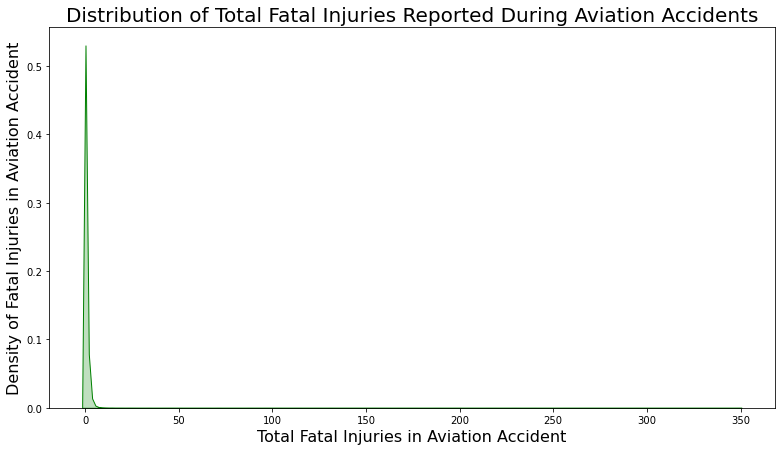

In [105]:
#check distribution of the total fatal injuries using Kernel Density Estimate (KDE)
#
plt.figure(figsize=(13, 7)) # sizing the graph
sns.kdeplot(df_merged['TOTAL.FATAL.INJURIES'], shade=True, color='green') # plotting the kde plot

plt.title('Distribution of Total Fatal Injuries Reported During Aviation Accidents', fontsize=20) # title label
plt.xlabel('Total Fatal Injuries in Aviation Accident', fontsize=16) # x-axis label
plt.ylabel('Density of Fatal Injuries in Aviation Accident', fontsize=16) # y-axis title


plt.show() # show the plot

There was a high frequency of fatal injuries with a frequency close to zero.

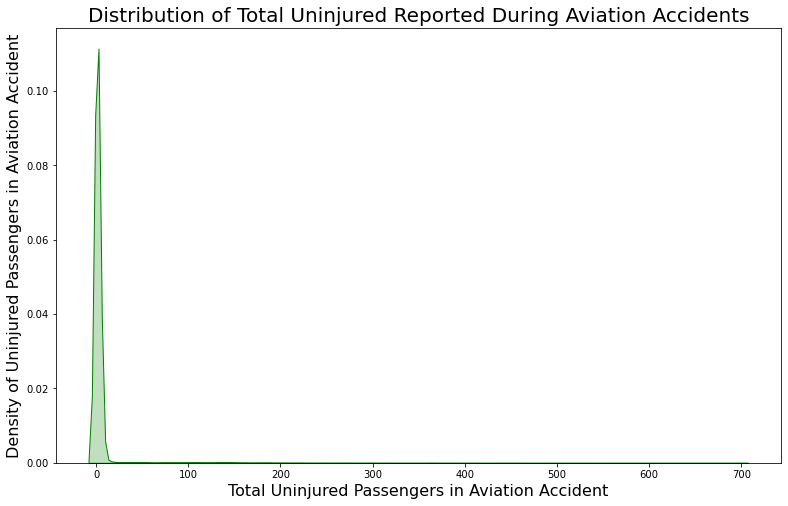

In [106]:
#check distribution of the total uninjured using Kernel Density Estimate (KDE)
#
plt.figure(figsize=(13, 8)) # sizing the graph
sns.kdeplot(df_merged['TOTAL.UNINJURED'], shade=True, color='green') # plotting the kde plot

plt.title('Distribution of Total Uninjured Reported During Aviation Accidents', fontsize=20) # title label
plt.xlabel('Total Uninjured Passengers in Aviation Accident', fontsize=16) # x-axis label
plt.ylabel('Density of Uninjured Passengers in Aviation Accident', fontsize=16) # y-axis title


plt.show() # show the plot

There was a high number of aviation accidents reported uninjured passengers with a frequency of 1. 

### 3.2.2 Bivariate analysis
- Analyse relationship between two variables

Bivariate analysis between event date and total uninjured

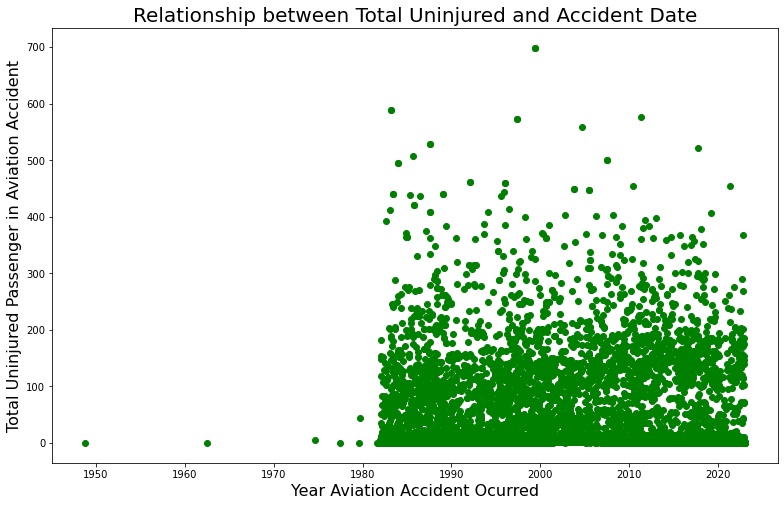

In [107]:
# Plotting scatter plot to check the relationship between event date and total uninjured
#
plt.figure(figsize=(13, 8)) # sizing the graph

plt.scatter(df_merged['EVENT.DATE'], df_merged['TOTAL.UNINJURED'], color='green') # Help come up with the scatter plot


plt.title('Relationship between Total Uninjured and Accident Date', fontsize=20) # Scatter plot title
plt.xlabel('Year Aviation Accident Ocurred', fontsize=16) # x-axis title
plt.ylabel('Total Uninjured Passenger in Aviation Accident', fontsize=16) # y-axis label

plt.show() # Show the plot


There was no correlation between event data and the total uninjured

Bivariate analysis between event date and total uninjured

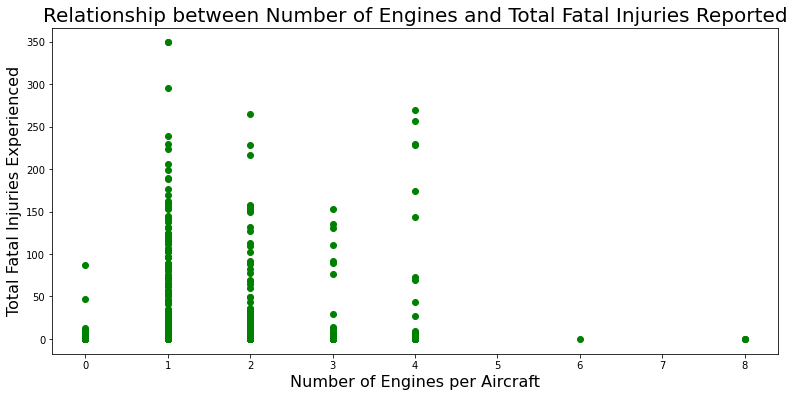

In [108]:
# Plotting scatter plot to check the relationship between event date and total uninjured
#
plt.figure(figsize=(13, 6)) # sizing the graph

plt.scatter(df_merged['NUMBER.OF.ENGINES'], df_merged['TOTAL.FATAL.INJURIES'], color='green') # Help come up wiht the scatter plot


plt.title('Relationship between Number of Engines and Total Fatal Injuries Reported', fontsize=20) # Scatter plot title
plt.xlabel('Number of Engines per Aircraft', fontsize=16) # x-axis title
plt.ylabel('Total Fatal Injuries Experienced', fontsize=16) # y-axis label

plt.show() # Show the plot


There were multiple fatal injuriries at specific values of number of engines. 

### 3.2.3 Multivariate analysis
Examines relationship between multiple variables at ago

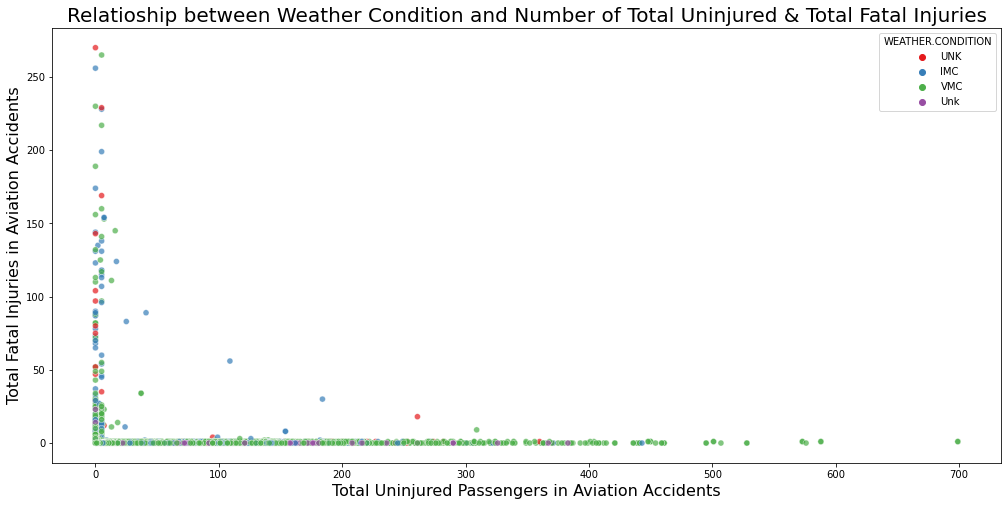

In [109]:
# Plotting scatter plot to check the relationship between weather condition and total fatal injuries a& and total uninjured
#
Total_uninjured_investigation_agg=df_merged.groupby('WEATHER.CONDITION')['TOTAL.UNINJURED'].sum().sort_values(ascending=False).head(10)
Total_fatal_injuries_investigation_agg=df_merged.groupby('WEATHER.CONDITION')['TOTAL.UNINJURED'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(17, 8)) # sizing the graph
sns.scatterplot(x=df_merged['TOTAL.UNINJURED'], y=df_merged['TOTAL.FATAL.INJURIES'], hue='WEATHER.CONDITION', data=df_merged, legend='full', alpha = .7, palette="Set1")  # Help come up wiht the scatter plot


plt.title('Relatioship between Weather Condition and Number of Total Uninjured & Total Fatal Injuries', fontsize=20) # Scatter plot title
plt.xlabel('Total Uninjured Passengers in Aviation Accidents', fontsize=16) # x-axis title
plt.ylabel('Total Fatal Injuries in Aviation Accidents', fontsize=16) # y-axis label

plt.show() # Show the plot

Both total uninjured and total fatal injuries have outliers among the accident types under VMC weather condition. The total uninjured passengers and total fatal injuries are concentrated around zero under VMC weather condition.

### Grouping for analysis

Establishing total fatalities per Engine type

In [110]:
# Group by 'Engine type' and sum the TOTAL.FATAL.INJURIES to establish total fatal injuries per Engine type
#
TOTAL_FATAL_INJURIES_PER_ENGINE_TYPE = df_merged.groupby('ENGINE.TYPE')['TOTAL.FATAL.INJURIES'].sum().sort_values(ascending=False)
print(TOTAL_FATAL_INJURIES_PER_ENGINE_TYPE)

ENGINE.TYPE
RECIPROCATING      50224.0
TURBO FAN           5047.0
TURBO PROP          3089.0
TURBO SHAFT         2264.0
TURBO JET            975.0
ELECTRIC               2.0
HYBRID ROCKET          1.0
UNK                    0.0
LR                     0.0
GEARED TURBOFAN        0.0
Name: TOTAL.FATAL.INJURIES, dtype: float64


Plotting bar graph of total fatalities per engine type

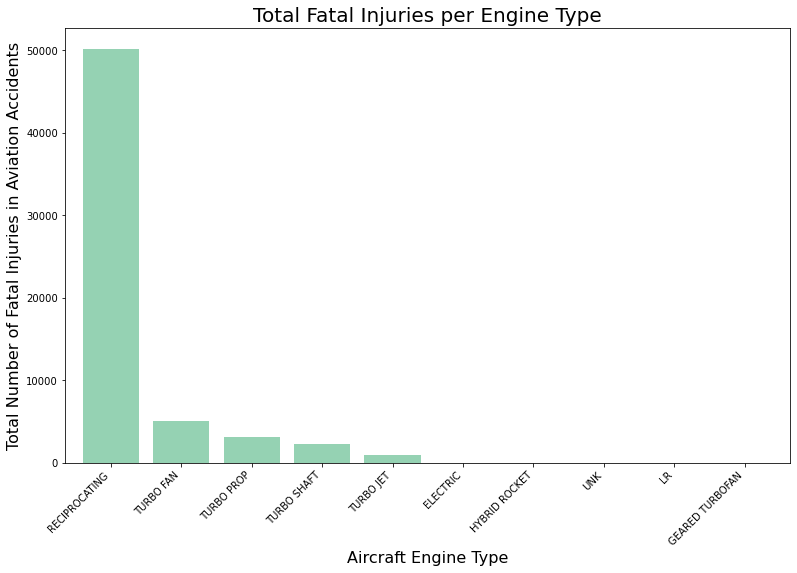

In [111]:
#plotting the Total fatal injuries per engine type using matplotlib
#
ENGINE_TYPE_PER_FATALITIES = TOTAL_FATAL_INJURIES_PER_ENGINE_TYPE

plt.figure(figsize=(13, 8)) # sizing the graph

ENGINE_TYPE_PER_FATALITIES.plot(kind='bar', color='#95D2B3', width=0.8) # bar plot features

plt.title('Total Fatal Injuries per Engine Type', fontsize=20) # title of the bar graph

plt.xlabel('Aircraft Engine Type', fontsize=16) # X-axis label
plt.ylabel('Total Number of Fatal Injuries in Aviation Accidents', fontsize=16) # y-axis label
plt.xticks(rotation=45, ha='right') # to rotate the x-axis labels for visualisation

plt.show()

UNK, LR, GEARED TURBOFAN engine types had not had fatalities over the period of review, i.e. between October 1948 and December 2022., turning out to be the safest engine types for an aircraft. RECIPROCATING, TURBO FAN and TURBO PROP were the engine types with the highest fatalities, proving to the most dangerous.

Establishing Total Uninjured per Engine type

In [112]:
TOTAL_UNINJURED_PER_ENGINE_TYPE = df_merged.groupby('ENGINE.TYPE')['TOTAL.UNINJURED'].sum().sort_values(ascending=False)
print(TOTAL_UNINJURED_PER_ENGINE_TYPE)

ENGINE.TYPE
TURBO FAN          211368.0
RECIPROCATING      201222.0
TURBO JET           34247.0
TURBO PROP          18185.0
TURBO SHAFT          6288.0
GEARED TURBOFAN       121.0
LR                     11.0
ELECTRIC                7.0
UNK                     0.0
HYBRID ROCKET           0.0
Name: TOTAL.UNINJURED, dtype: float64


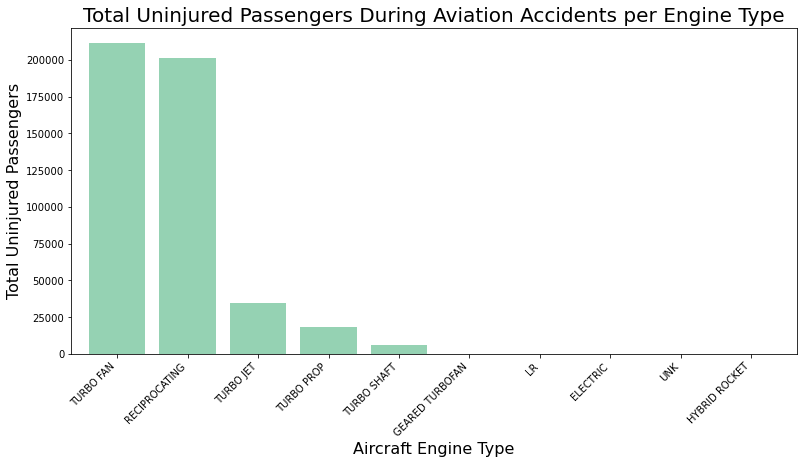

In [113]:
#plotting the Total Uninjured per engine type using matplotlib
#
ENGINE_TYPE_PER_NO_INJURIES = TOTAL_UNINJURED_PER_ENGINE_TYPE

plt.figure(figsize=(13, 6)) # sizing the graph

ENGINE_TYPE_PER_NO_INJURIES.plot(kind='bar', color='#95D2B3', width=0.8) # bar plot features

plt.title('Total Uninjured Passengers During Aviation Accidents per Engine Type', fontsize=20) # title of the bar graph

plt.xlabel('Aircraft Engine Type', fontsize=16) # X-axis label
plt.ylabel('Total Uninjured Passengers', fontsize=16) # y-axis label
plt.xticks(rotation=45, ha='right') # to rotate the x-axis labels for visualisation

plt.show()

Turbo Fan, Reciprocating  and  Turbo Jet are the engine types with then highest uninjired at 211,368, 201,222 and 34,247, respectively during the period under review.


Plotting bar graph of total fatalities per  number of engines

In [114]:
TOTAL_FATAL_INJURIES_PER_NUMBER_OF_ENGINE = df_merged.groupby('NUMBER.OF.ENGINES')['TOTAL.FATAL.INJURIES'].sum().sort_values(ascending=False)

print(TOTAL_FATAL_INJURIES_PER_NUMBER_OF_ENGINE)

NUMBER.OF.ENGINES
1.0    46376.0
2.0    11903.0
4.0     1722.0
3.0      936.0
0.0      665.0
8.0        0.0
6.0        0.0
Name: TOTAL.FATAL.INJURIES, dtype: float64


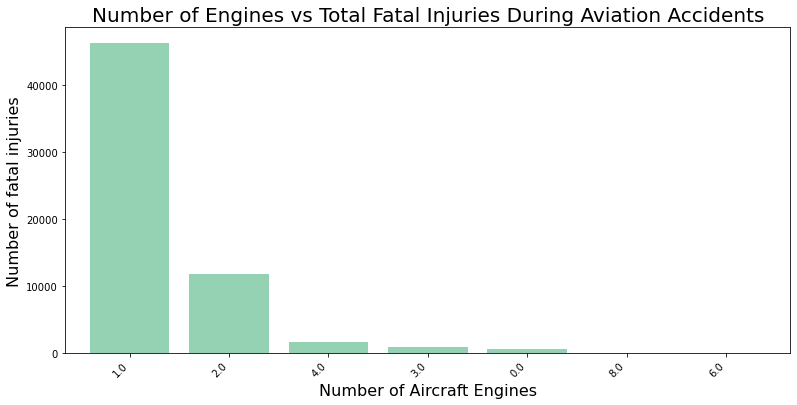

In [115]:
# Plot number of engines vs total fatal injuries using matplotlib
#
# group total fatalities per number of engine
ENGINES_PER_FATALITIES=TOTAL_FATAL_INJURIES_PER_NUMBER_OF_ENGINE


plt.figure(figsize=(13, 6)) # sizing the graph

ENGINES_PER_FATALITIES.plot(kind='bar',color='#95D2B3', width=0.8) # features of the bar graph
plt.title('Number of Engines vs Total Fatal Injuries During Aviation Accidents', fontsize=20) # bar title
plt.xlabel('Number of Aircraft Engines', fontsize=16) # X-axis label
plt.ylabel('Number of fatal injuries', fontsize=16) # y-axis title
plt.xticks(rotation=45, ha='right') # to rotate the x-axis labels for visualisation
plt.show() 

Aircraft with 6 or 8 engines experienced nil fatal injuries between October 1948 and December 2022.

Plotting bar graph of total uninjured per  number of engines

In [116]:
TOTAL_FATAL_UNINJURED_PER_NUMBER_OF_ENGINE = df_merged.groupby('NUMBER.OF.ENGINES')['TOTAL.UNINJURED'].sum().sort_values(ascending=False)

print(TOTAL_FATAL_UNINJURED_PER_NUMBER_OF_ENGINE)

NUMBER.OF.ENGINES
2.0    198945.0
1.0    176367.0
3.0     51421.0
4.0     40987.0
0.0      3718.0
8.0        11.0
6.0         0.0
Name: TOTAL.UNINJURED, dtype: float64


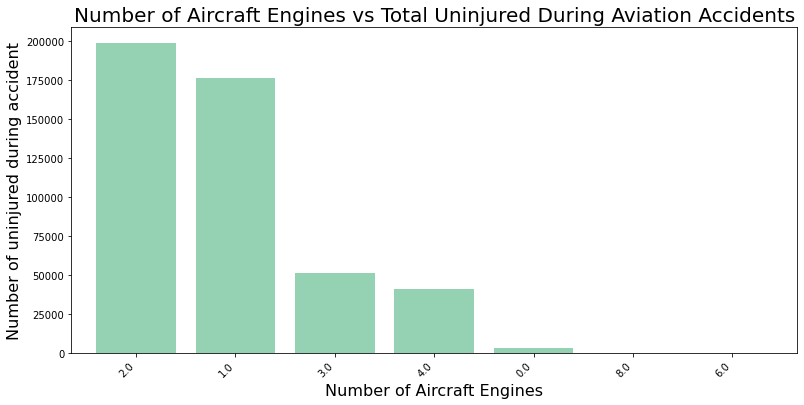

In [117]:
# Plot number of engines vs total uninjured using matplotlib
#
# group total uninjured per number of engine
ENGINES_PER_UNINJURED=TOTAL_FATAL_UNINJURED_PER_NUMBER_OF_ENGINE


plt.figure(figsize=(13, 6)) # sizing the graph

ENGINES_PER_UNINJURED.plot(kind='bar',color='#95D2B3', width=0.8) # features of the bar graph
plt.title('Number of Aircraft Engines vs Total Uninjured During Aviation Accidents', fontsize=20) # bar title
plt.xlabel('Number of Aircraft Engines', fontsize=16) # X-axis label
plt.ylabel('Number of uninjured during accident', fontsize=16) # y-axis title
plt.xticks(rotation=45, ha='right') # to rotate the x-axis labels for visualisation

plt.show() 

Aircraft with 2 engines experienced the highest number of uninjured at 198,945 while those with one engine came second with 176,367 uninjured.

Plotting a graph of Aircraft make with the highest total uninjured

In [118]:
# to get top 10 makes with the highest total uninjured
#
Top_10_Make_per_Total_Uninjured = df_merged.groupby('MAKE')['TOTAL.UNINJURED'].sum().sort_values(ascending=False).head(10)

print(Top_10_Make_per_Total_Uninjured)

MAKE
BOEING               209195.0
MCDONNELL DOUGLAS     45292.0
CESSNA                42522.0
PIPER                 22102.0
AIRBUS INDUSTRIE      21326.0
AIRBUS                21276.0
BEECH                 10086.0
DOUGLAS                8870.0
LOCKHEED               8216.0
EMBRAER                6425.0
Name: TOTAL.UNINJURED, dtype: float64


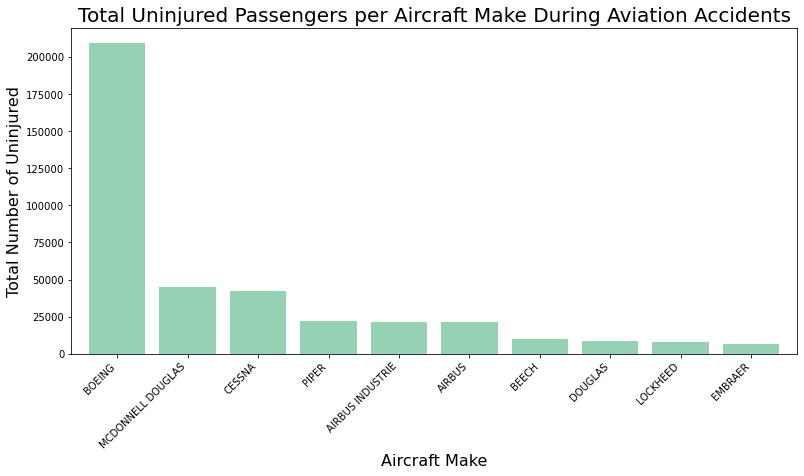

In [119]:
# Relationship between aircraft make vs total uninjured using matplotlib
#
plt.figure(figsize=(13, 6)) # sizing the graph

Top_10_Make_per_Total_Uninjured.plot(kind='bar', color='#95D2B3', width=0.8) # bar plot features

plt.title('Total Uninjured Passengers per Aircraft Make During Aviation Accidents', fontsize=20) # title of the bar graph

plt.xlabel('Aircraft Make', fontsize=16) # X-axis label
plt.ylabel('Total Number of Uninjured', fontsize=16) # y-axis label
plt.xticks(rotation=45, ha='right') # to rotate the x-axis labels for visualisation

plt.show()

Boeing, MCDonnnel Douglas and Cessna makes of aircraft had the highest number of uninjured cases during accidents. Boeing had a considerable number of uninjured at 209,195, with MCDonnel Douglas coming a distant second with 45,292 as uninjured during the accident incidents. Cessna came third with 42,522 uninjured during the period of review.

Plotting a graph of Aircraft model with the highest total uninjured

In [120]:
# to get top 10 models with the highest total uninjured
#
Top_10_models_per_Total_Uninjured = df_merged.groupby('MODEL')['TOTAL.UNINJURED'].sum().sort_values(ascending=False).head(10)
print(Top_10_models_per_Total_Uninjured)

MODEL
737         25461.0
777          9439.0
DC-10-10     6860.0
767          6370.0
747-400      6280.0
DC-10-30     5810.0
747          5062.0
757          4988.0
727-200      4369.0
DC-9-82      4121.0
Name: TOTAL.UNINJURED, dtype: float64


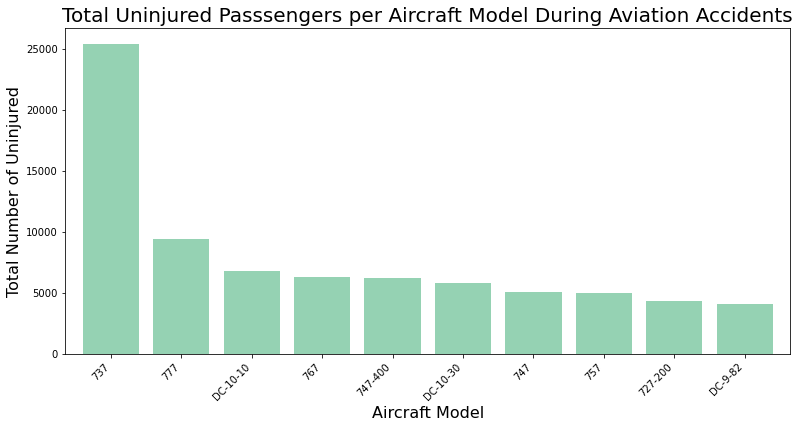

In [121]:
# Relationship between aircraft models vs total uninjured using matplotlib
#
plt.figure(figsize=(13, 6)) # sizing the graph

Top_10_models_per_Total_Uninjured.plot(kind='bar', color='#95D2B3', width=0.8) # bar plot features

plt.title('Total Uninjured Passsengers per Aircraft Model During Aviation Accidents', fontsize=20) # title of the bar graph

plt.xlabel('Aircraft Model', fontsize=16) # X-axis label
plt.ylabel('Total Number of Uninjured', fontsize=16) # y-axis label
plt.xticks(rotation=45, ha='right') # to rotate the x-axis labels for visualisation

plt.show()

Models 737, 777 and DC-10-10 had the highest number of uninjured cases during the period under review. Model 737 had considerable number of uninjured at 25,461 incidents while 777 and DC-10-10 reported 9,439 and 6,860 uninjured cases.


Plotting bar graph of total fatalities per  aircraft make

In [122]:
# to get top 10 makes with the highest total fatal injuries
#
Top_10_Makes_per_Total_Fatal_Injuries = df_merged.groupby('MAKE')['TOTAL.FATAL.INJURIES'].sum().sort_values(ascending=False).head(10)
print(Top_10_Makes_per_Total_Fatal_Injuries)

MAKE
CESSNA               13044.0
BOEING                9223.0
PIPER                 8364.0
BEECH                 4361.0
BELL                  1702.0
MCDONNELL DOUGLAS     1430.0
AIRBUS                1342.0
AIRBUS INDUSTRIE      1242.0
DOUGLAS               1016.0
ROBINSON               890.0
Name: TOTAL.FATAL.INJURIES, dtype: float64


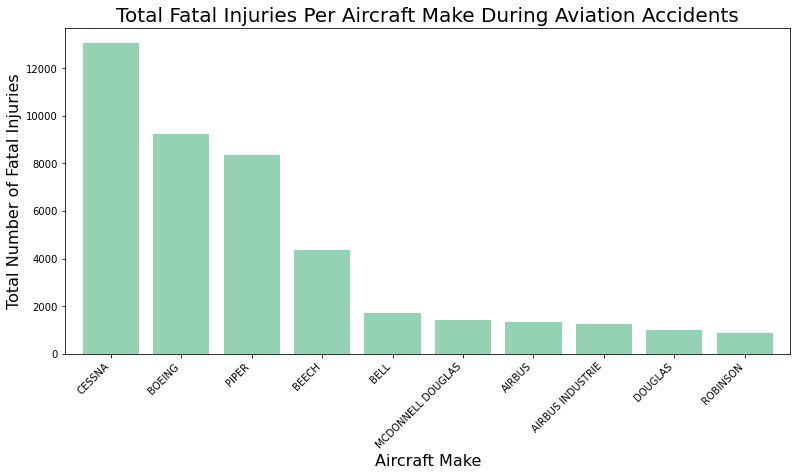

In [123]:
# Relationship between aircraft make vs total fatal injuries using matplotlib
#
plt.figure(figsize=(13, 6)) # sizing the graph

Top_10_Makes_per_Total_Fatal_Injuries.plot(kind='bar', color='#95D2B3', width=0.8) # bar plot features

plt.title('Total Fatal Injuries Per Aircraft Make During Aviation Accidents', fontsize=20) # title of the bar graph

plt.xlabel('Aircraft Make', fontsize=16) # X-axis label
plt.ylabel('Total Number of Fatal Injuries', fontsize=16) # y-axis label
plt.xticks(rotation=45, ha='right') # to rotate the x-axis labels for visualisation

plt.show()

Cessna, Boeing and Piper are the top three makes of aircraft with the most fatal injuries during accidents at 13,044, 9,223 and 8,364, respectively.

Plotting bar graph of total fatalities per  aircraft model

In [124]:
# to get top 10 models with the highest total fatal injuries
#
Top_10_Models_per_Total_Fatal_Injuries = df_merged.groupby('MODEL')['TOTAL.FATAL.INJURIES'].sum().sort_values(ascending=False).head(10)
print(Top_10_Models_per_Total_Fatal_Injuries)

MODEL
737          1356.0
737-200       919.0
152           698.0
172N          603.0
777 - 206     534.0
172           523.0
A320          519.0
MD-82         456.0
PA-28-181     446.0
PA-28-140     426.0
Name: TOTAL.FATAL.INJURIES, dtype: float64


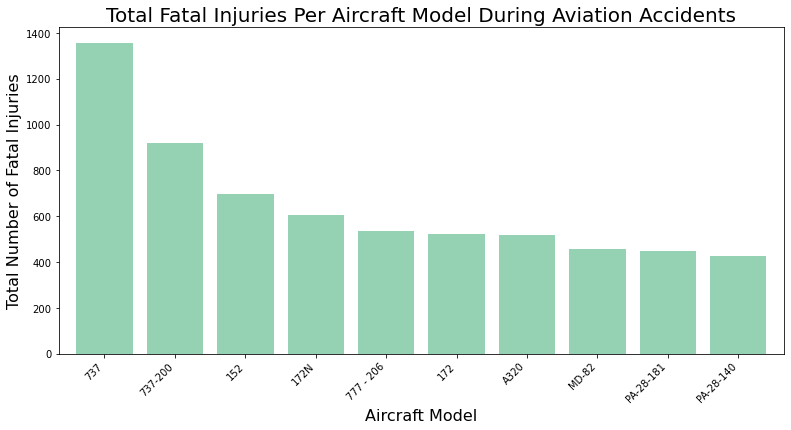

In [125]:
# Relationship between aircraft model vs total fatal injuries using matplotlib
#
plt.figure(figsize=(13, 6)) # sizing the graph

Top_10_Models_per_Total_Fatal_Injuries.plot(kind='bar', color='#95D2B3', width=0.8) # bar plot features

plt.title('Total Fatal Injuries Per Aircraft Model During Aviation Accidents', fontsize=20) # title of the bar graph

plt.xlabel('Aircraft Model', fontsize=16) # X-axis label
plt.ylabel('Total Number of Fatal Injuries', fontsize=16) # y-axis label
plt.xticks(rotation=45, ha='right') # to rotate the x-axis labels for visualisation

plt.show()

# Conclusion


## Finding

1. Boeing, MCDonnnel Douglas and Cessna makes of aircraft had the highest number of uninjured cases during accidents. Boeing had a considerable number of uninjured at 209,195, with MCDonnel Douglas coming a distant second with 45,292 as uninjured during the accident incidents. Cessna came third with 42,522 uninjured during the period of review.

2. Cessna, Boeing and Piper are the top three makes of aircraft with the most fatal injuries during accidents at 13,044, 9,223 and 8,364, respectively. This is as per the as per the analysis of the Aviation Accident Database & Synopses, up to 2023 dataset.

3. Aircraft models 737, 737-200, and 152 are the most involved in fatal accidents. 

4. Models 737, 777 and DC-10-10 had the highest number of uninjured cases during the period under review. Model 737 had considerable number of uninjured at 25,461 incidents while 777 and DC-10-10 reported 9,439 and 6,860 uninjured cases.

5. Turbo Fan, Reciprocating  and  Turbo Jet are the engine type with then highest uninjired at 211,368,  201,222 and 34,247, respectively during the period under review.

6. Aircraft with 6 or 8 engines experienced nil fatal injuries between October 1948 and December 2022.

7. Aircraft with 2 engines experienced the highest number of uninjured at 198,945 while those with one engine came second with 176,367 uninjured.


## Based on the above findings, I recommend the following to the compamy so as to obtain an aircraft with the the lowest risk:

1. The business to think about buying aircrafts of Boeing and MCDonnell Douglas make. Considering the large proportion of people who reported not being hurt during the accidents between 1948 and 2023, Boeing exhibited a high level of safety. The McDonnell Douglas brand of aircraft is the second safest because, in addition to having the second-highest percentage of unhurt crashes, it did not rank among the top three manufacturers of crashes resulting in the greatest number of fatalities during the evaluation period. 

2. The aircraft with turbo fan engines had the highest number of uninjured occurrences as per the analysis of the Aviation Accident Database & Synopses, up to 2023 dataset, making them safe for the company to purchase. 

3.  The aircraft with two engines proved to be the safest, with the maximum number of uninjured—198,945—while the aircraft with one engine came in second with 176,367 uninjured. The corporation should purchase one of these aircrafts.





Saving cleaned data to csv

In [126]:
# Saving a dataframe to a csv using .to_csv
#
df_merged.to_csv('Merged_aviation_data.csv', index=False)

Successfully exported the cleaned dataframe to csv format.